**RUN ALL THE CELLS AND DON'T EDIT ANY CELL**

**CODE IN THE MENTIONED CELLS ONLY**

## Import Necessary Files

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Add ```/path/to/your/folder``` to load the images

In [3]:
cartoon = cv2.imread("images\cartoon.bmp")
cartoon_y = cv2.imread("images\cartoon_y.jpg")
girl = cv2.imread("images\girl.png") #grayscale image
girl_y = cv2.imread("images\girl_y.jpg")
fingerprint = cv2.imread(r"images\fingerprint.jpg")
fingerprint_y = cv2.imread(r"images\fingerprint_y.jpg")

## Raw and Final Image
You need to process the raw images: ```cartoon, girl, fingerprint``` to get the processed images: ```cartoon_y, girl_y, fingerprint_y```

Your processed image need not be 100% alike given processed image. They are given to give you an idea of what to process in the raw images.

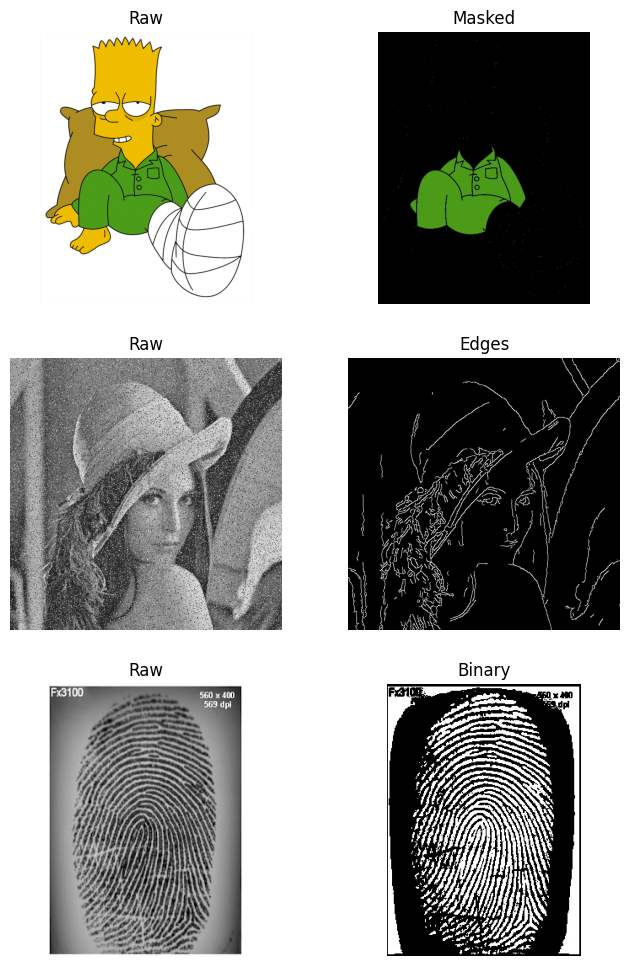

In [4]:
fig, axs = plt.subplots(3,2,figsize=(8,12))
axs[0,0].imshow(cv2.cvtColor(cartoon,cv2.COLOR_BGR2RGB))
axs[0,1].imshow(cartoon_y)
axs[0,0].axis("off")
axs[0,1].axis("off")
axs[0,0].set_title("Raw")
axs[0,1].set_title("Masked")
axs[1,0].imshow(girl)
axs[1,1].imshow(girl_y)
axs[1,0].axis("off")
axs[1,1].axis("off")
axs[1,0].set_title("Raw")
axs[1,1].set_title("Edges")
axs[2,0].imshow(cv2.cvtColor(fingerprint,cv2.COLOR_BGR2RGB))
axs[2,1].imshow(fingerprint_y)
axs[2,0].axis("off")
axs[2,1].axis("off")
axs[2,0].set_title("Raw")
axs[2,1].set_title("Binary")
plt.show()

## Code in the following 3 cells only

### Cartoon
For the bart image, you need to mask the dress. Write all your code in the cell below and the final image should be stored in ```cartoon_y_mentee``` variable only or it'll show error later.

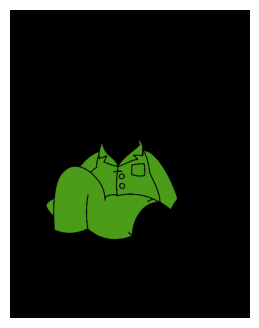

In [5]:
#START CODE HERE (Do all your processing here)
bart_hsv=cv2.cvtColor(cartoon, cv2.COLOR_BGR2HSV)

# define range of blue color in HSV
lower_yellow = np.array([45,100,100])
upper_yellow = np.array([75,255,255])

# Create a mask. Threshold the HSV image to get only yellow colors
mask = cv2.inRange(bart_hsv, lower_yellow, upper_yellow)

# Bitwise-AND mask and original image
mask_bit = cv2.bitwise_and(cartoon,cartoon, mask= mask)

cartoon_y_mentee=cv2.cvtColor(mask_bit,cv2.COLOR_BGR2RGB)   #(in RGB format only)

#END CODE HERE (the final processed image should be cartoon_y_mentee)
fig,ax=plt.subplots(figsize=(4,4))
ax.imshow(cartoon_y_mentee)
ax.axis('off')
plt.show()

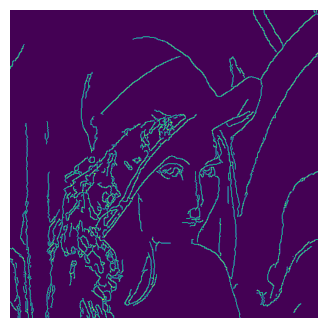

In [30]:
#START CODE HERE (Do all your processing here)
blur=cv2.medianBlur(girl,7)

edge=cv2.Canny(blur,45,135)
girl_y_mentee =cv2.dilate(edge,np.ones((1,1),dtype=np.int8))  #make the edges thick

#END CODE HERE (the final processed image should be girl_y_mentee)
fig,ax=plt.subplots(figsize=(4,4))
ax.imshow(girl_y_mentee)
ax.axis('off')
plt.show()

### Fingerprint
For the fingerprint image, you need to convert it to binary image. Binary images have 2 intensities only (0 or 255). Write all your code in the cell below and the final image should be stored in ```cartoon_y_mentee``` variable only or it'll show error later.

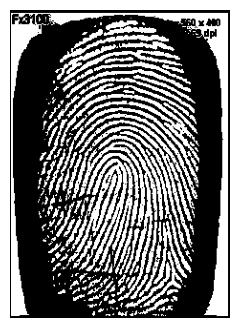

In [31]:
#START CODE HERE (Do all your processing here)
img_gray=cv2.cvtColor(fingerprint,cv2.COLOR_BGR2GRAY)
ret,thresh=cv2.threshold(img_gray,105,255,cv2.THRESH_BINARY_INV)

fingerprint_y_mentee=cv2.cvtColor(thresh,cv2.COLOR_GRAY2RGB) #(in Binary format only i.e. pixel intensity = 0 or 255)

#END CODE HERE (the final processed image should be fingerprint_y_mentee)
fig,ax=plt.subplots(figsize=(4,4))
ax.imshow(fingerprint_y_mentee)
ax.axis('off')
plt.show()

## Comparison

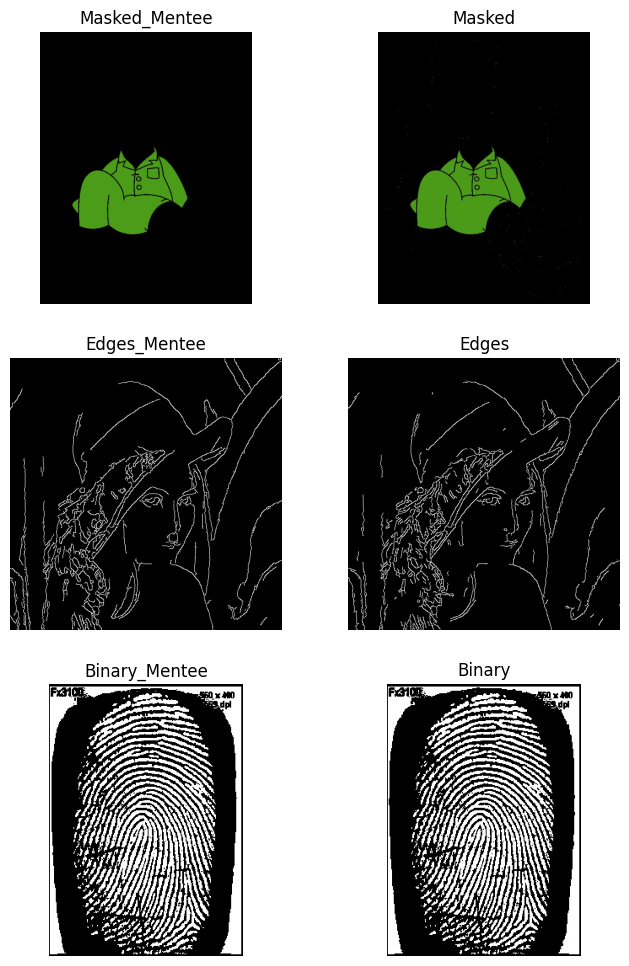

In [32]:
fig, axs1 = plt.subplots(3,2,figsize=(8,12))
axs1[0,0].imshow(cartoon_y_mentee)
axs1[0,1].imshow(cartoon_y)
axs1[0,0].axis("off")
axs1[0,1].axis("off")
axs1[0,0].set_title("Masked_Mentee")
axs1[0,1].set_title("Masked")
axs1[1,0].imshow(girl_y_mentee,cmap="gray")
axs1[1,1].imshow(girl_y)
axs1[1,0].axis("off")
axs1[1,1].axis("off")
axs1[1,0].set_title("Edges_Mentee")
axs1[1,1].set_title("Edges")
axs1[2,0].imshow(fingerprint_y_mentee,cmap="gray")
axs1[2,1].imshow(fingerprint_y)
axs1[2,0].axis("off")
axs1[2,1].axis("off")
axs1[2,0].set_title("Binary_Mentee")
axs1[2,1].set_title("Binary")
plt.show()